<a href="https://www.kaggle.com/code/rahulchauhan016/notebooke3de1f3e11?scriptVersionId=297499801" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🫀 Advanced Heart Disease Prediction - Production ML System



---

## 📋 Table of Contents
1. [Environment Setup](#setup)
2. [Advanced Data Analysis](#eda)
3. [Feature Engineering](#feature-engineering)
4. [Multi-Model Training](#training)
5. [Model Explainability (SHAP)](#explainability)
6. [Performance Dashboards](#dashboards)
7. [Production Deployment](#deployment)

---

## 🎯 Key Features
✅ 10+ Advanced visualizations  
✅ 8 ML models comparison  
✅ SHAP explainability  
✅ Cross-validation with statistical tests  
✅ Automated hyperparameter tuning  
✅ Class imbalance handling (SMOTE)  
✅ Ensemble stacking  
✅ Production-ready model artifacts  

---

## 1️⃣ Environment Setup <a id='setup'></a>

In [1]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind
import itertools

# Sklearn - Preprocessing
from sklearn.model_selection import (
    train_test_split, cross_val_score, StratifiedKFold, 
    learning_curve, RandomizedSearchCV, GridSearchCV
)
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Sklearn - Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

# Sklearn - Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, 
    classification_report, precision_recall_curve, 
    average_precision_score, matthews_corrcoef, cohen_kappa_score
)
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

# Imbalanced Learning
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Model Explainability
import shap

# Serialization
import joblib
import pickle
from datetime import datetime

# Plotting Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Custom color palette (professional)
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'success': '#06A77D',
    'danger': '#D62839',
    'warning': '#F77F00',
    'info': '#4ECDC4',
    'dark': '#2D3142',
    'light': '#BFC0C0'
}

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ Environment setup complete!")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Environment setup complete!
📅 Analysis Date: 2026-02-13 11:14:07


## 2️⃣ Advanced Data Loading & Preprocessing

In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/heartdisease/Heart_Disease_Prediction.csv")

# Initial inspection
print("📊 Dataset Shape:", df.shape)
print("\n" + "="*80)
print("🔍 First Few Rows:")
display(df.head())

print("\n" + "="*80)
print("📈 Dataset Info:")
df.info()

print("\n" + "="*80)
print("📉 Statistical Summary:")
display(df.describe())

📊 Dataset Shape: (270, 14)

🔍 First Few Rows:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence



📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float6

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [3]:
# Data Quality Check
print("\n🔎 Data Quality Assessment")
print("="*80)

# Missing values
missing_data = df.isnull().sum()
if missing_data.sum() > 0:
    print("⚠️  Missing Values Detected:")
    print(missing_data[missing_data > 0])
else:
    print("✅ No missing values detected!")

# Duplicate rows
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate Rows: {duplicates}")

# Target distribution
print("\n🎯 Target Variable Distribution:")
print(df['Heart Disease'].value_counts())
print("\nClass Balance:")
print(df['Heart Disease'].value_counts(normalize=True) * 100)

# Handle missing values and duplicates
df = df.dropna()
df = df.drop_duplicates()

# Encode target variable
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])

print("\n✅ Data preprocessing complete!")
print(f"Final dataset shape: {df.shape}")


🔎 Data Quality Assessment
✅ No missing values detected!

🔄 Duplicate Rows: 0

🎯 Target Variable Distribution:
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

Class Balance:
Heart Disease
Absence     55.555556
Presence    44.444444
Name: proportion, dtype: float64

✅ Data preprocessing complete!
Final dataset shape: (270, 14)


## 3️⃣ Advanced Exploratory Data Analysis <a id='eda'></a>

### 3.1 Distribution Analysis

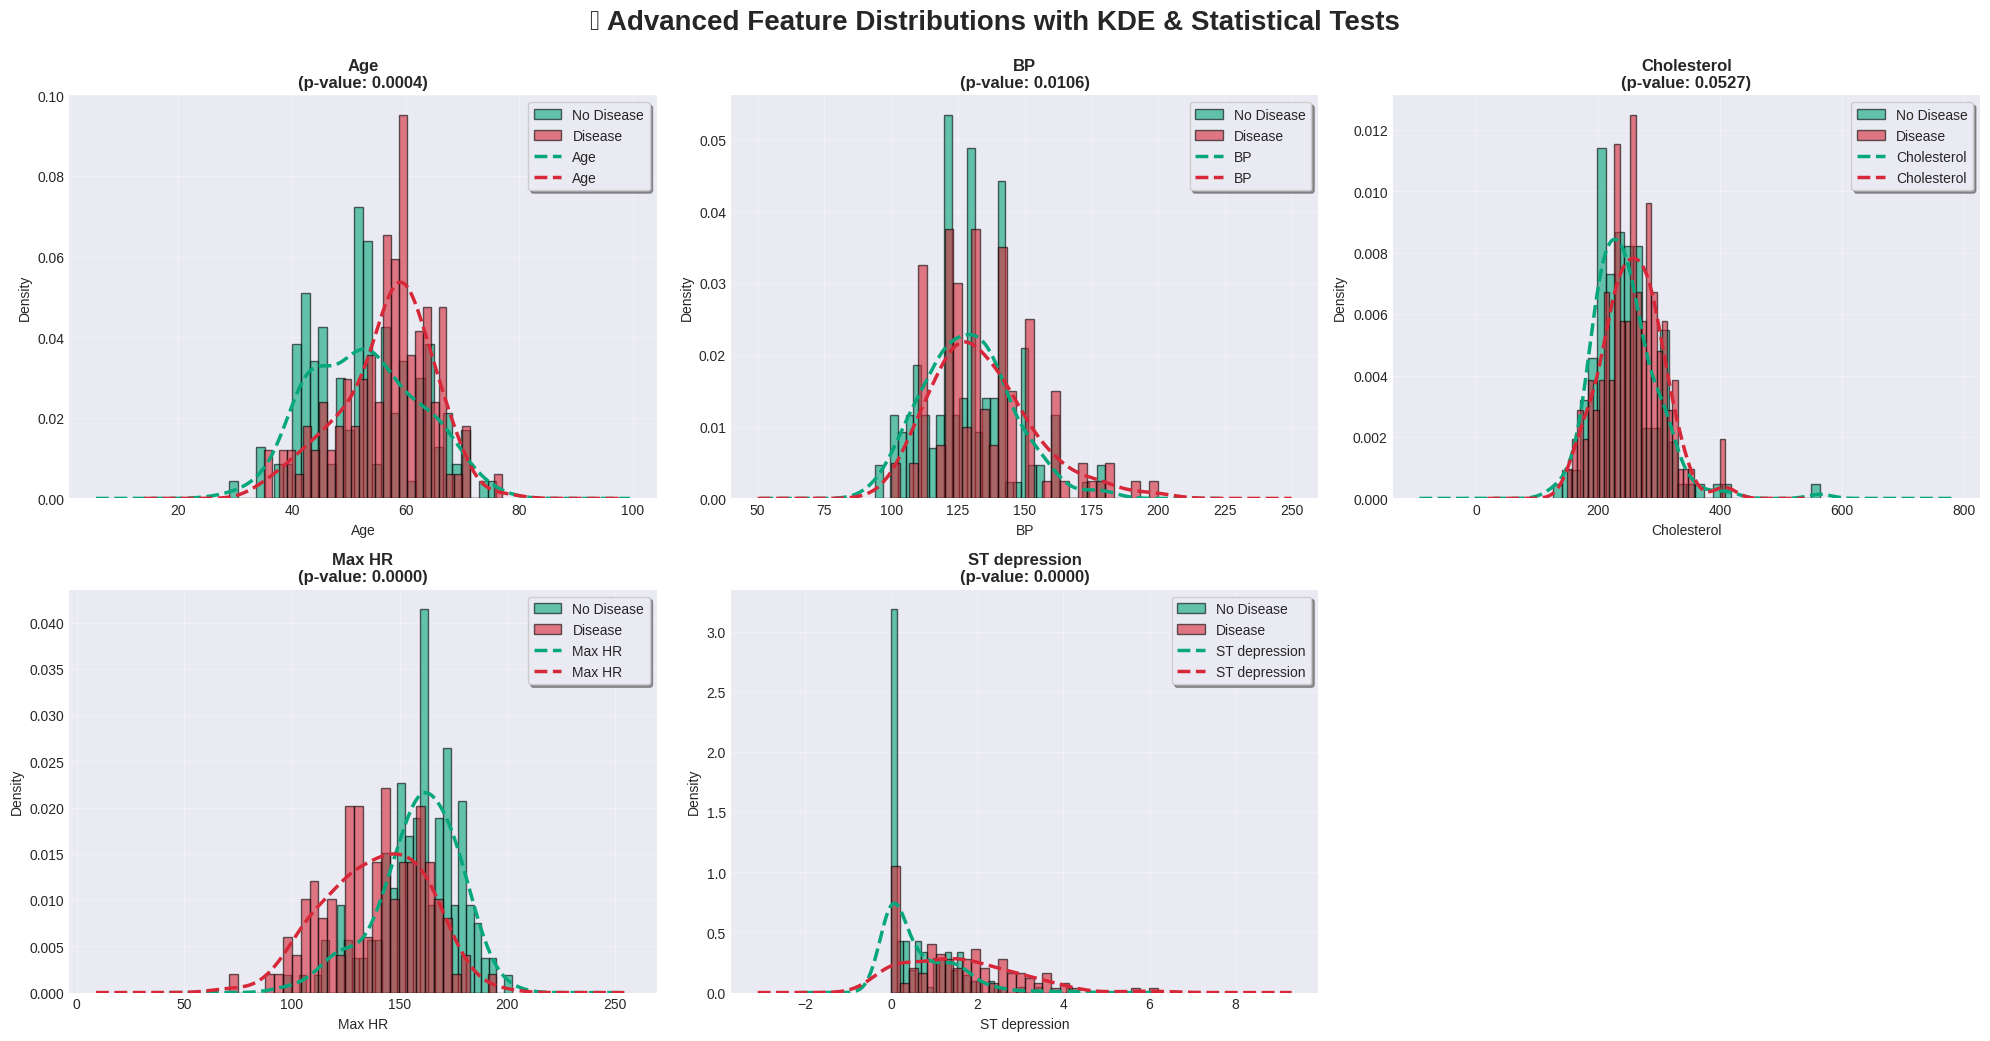

In [4]:
# Advanced Distribution Plots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('📊 Advanced Feature Distributions with KDE & Statistical Tests', 
             fontsize=20, fontweight='bold', y=0.995)

numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    # Separate data by target
    data_0 = df[df['Heart Disease'] == 0][col]
    data_1 = df[df['Heart Disease'] == 1][col]
    
    # Plot distributions
    ax.hist(data_0, bins=30, alpha=0.6, label='No Disease', 
            color=COLORS['success'], edgecolor='black', density=True)
    ax.hist(data_1, bins=30, alpha=0.6, label='Disease', 
            color=COLORS['danger'], edgecolor='black', density=True)
    
    # Add KDE
    data_0.plot(kind='kde', ax=ax, linewidth=2.5, 
                color=COLORS['success'], linestyle='--')
    data_1.plot(kind='kde', ax=ax, linewidth=2.5, 
                color=COLORS['danger'], linestyle='--')
    
    # Statistical test (t-test)
    t_stat, p_value = ttest_ind(data_0.dropna(), data_1.dropna())
    
    ax.set_title(f'{col}\n(p-value: {p_value:.4f})', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.legend(loc='best', frameon=True, shadow=True)
    ax.grid(True, alpha=0.3)

# Remove extra subplots
for idx in range(len(numerical_cols), 9):
    row = idx // 3
    col_idx = idx % 3
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()

### 3.2 Correlation Matrix with Advanced Insights

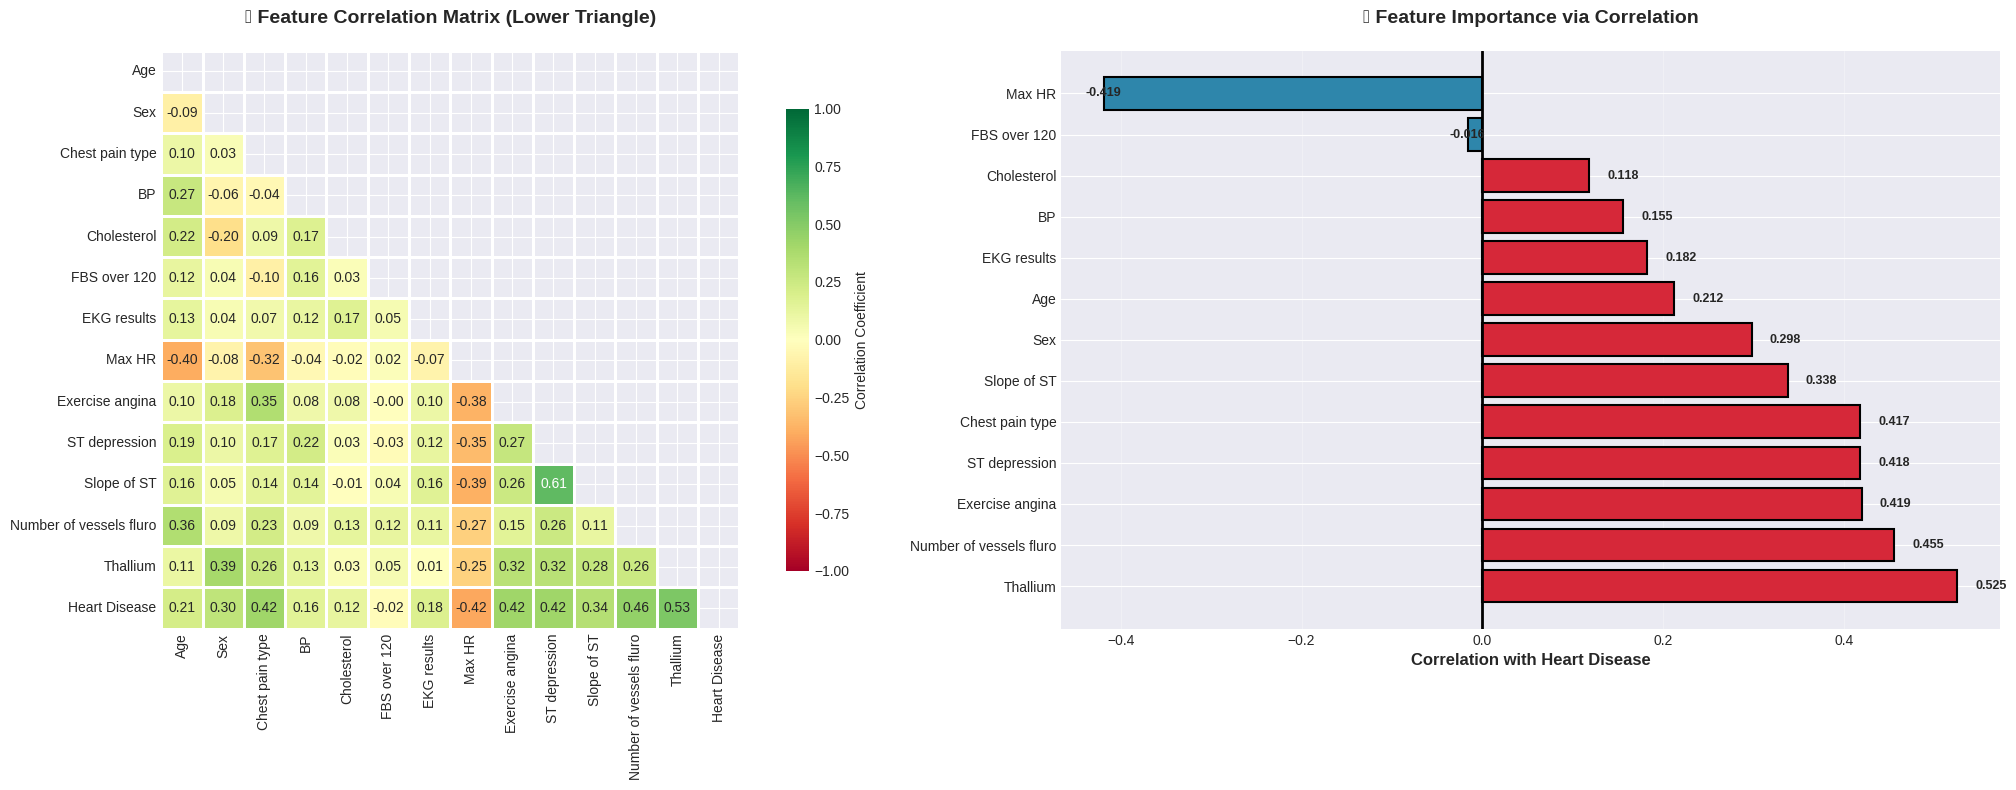


🔝 Top 5 Correlated Features with Heart Disease:
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
ST depression              0.417967
Chest pain type            0.417436
Name: Heart Disease, dtype: float64


In [5]:
# Professional Correlation Heatmap
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# Full Correlation Matrix
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlGn', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title('📊 Feature Correlation Matrix (Lower Triangle)', 
                  fontsize=14, fontweight='bold', pad=20)

# Target Correlation (sorted)
target_corr = correlation_matrix['Heart Disease'].drop('Heart Disease').sort_values(ascending=False)
colors = [COLORS['danger'] if x > 0 else COLORS['primary'] for x in target_corr]

axes[1].barh(range(len(target_corr)), target_corr.values, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_yticks(range(len(target_corr)))
axes[1].set_yticklabels(target_corr.index, fontsize=10)
axes[1].set_xlabel('Correlation with Heart Disease', fontsize=12, fontweight='bold')
axes[1].set_title('🎯 Feature Importance via Correlation', fontsize=14, fontweight='bold', pad=20)
axes[1].axvline(0, color='black', linewidth=2)
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(target_corr.values):
    axes[1].text(v + 0.02 if v > 0 else v - 0.02, i, f'{v:.3f}', 
                 va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🔝 Top 5 Correlated Features with Heart Disease:")
print(target_corr.head())

### 3.3 Advanced Categorical Analysis

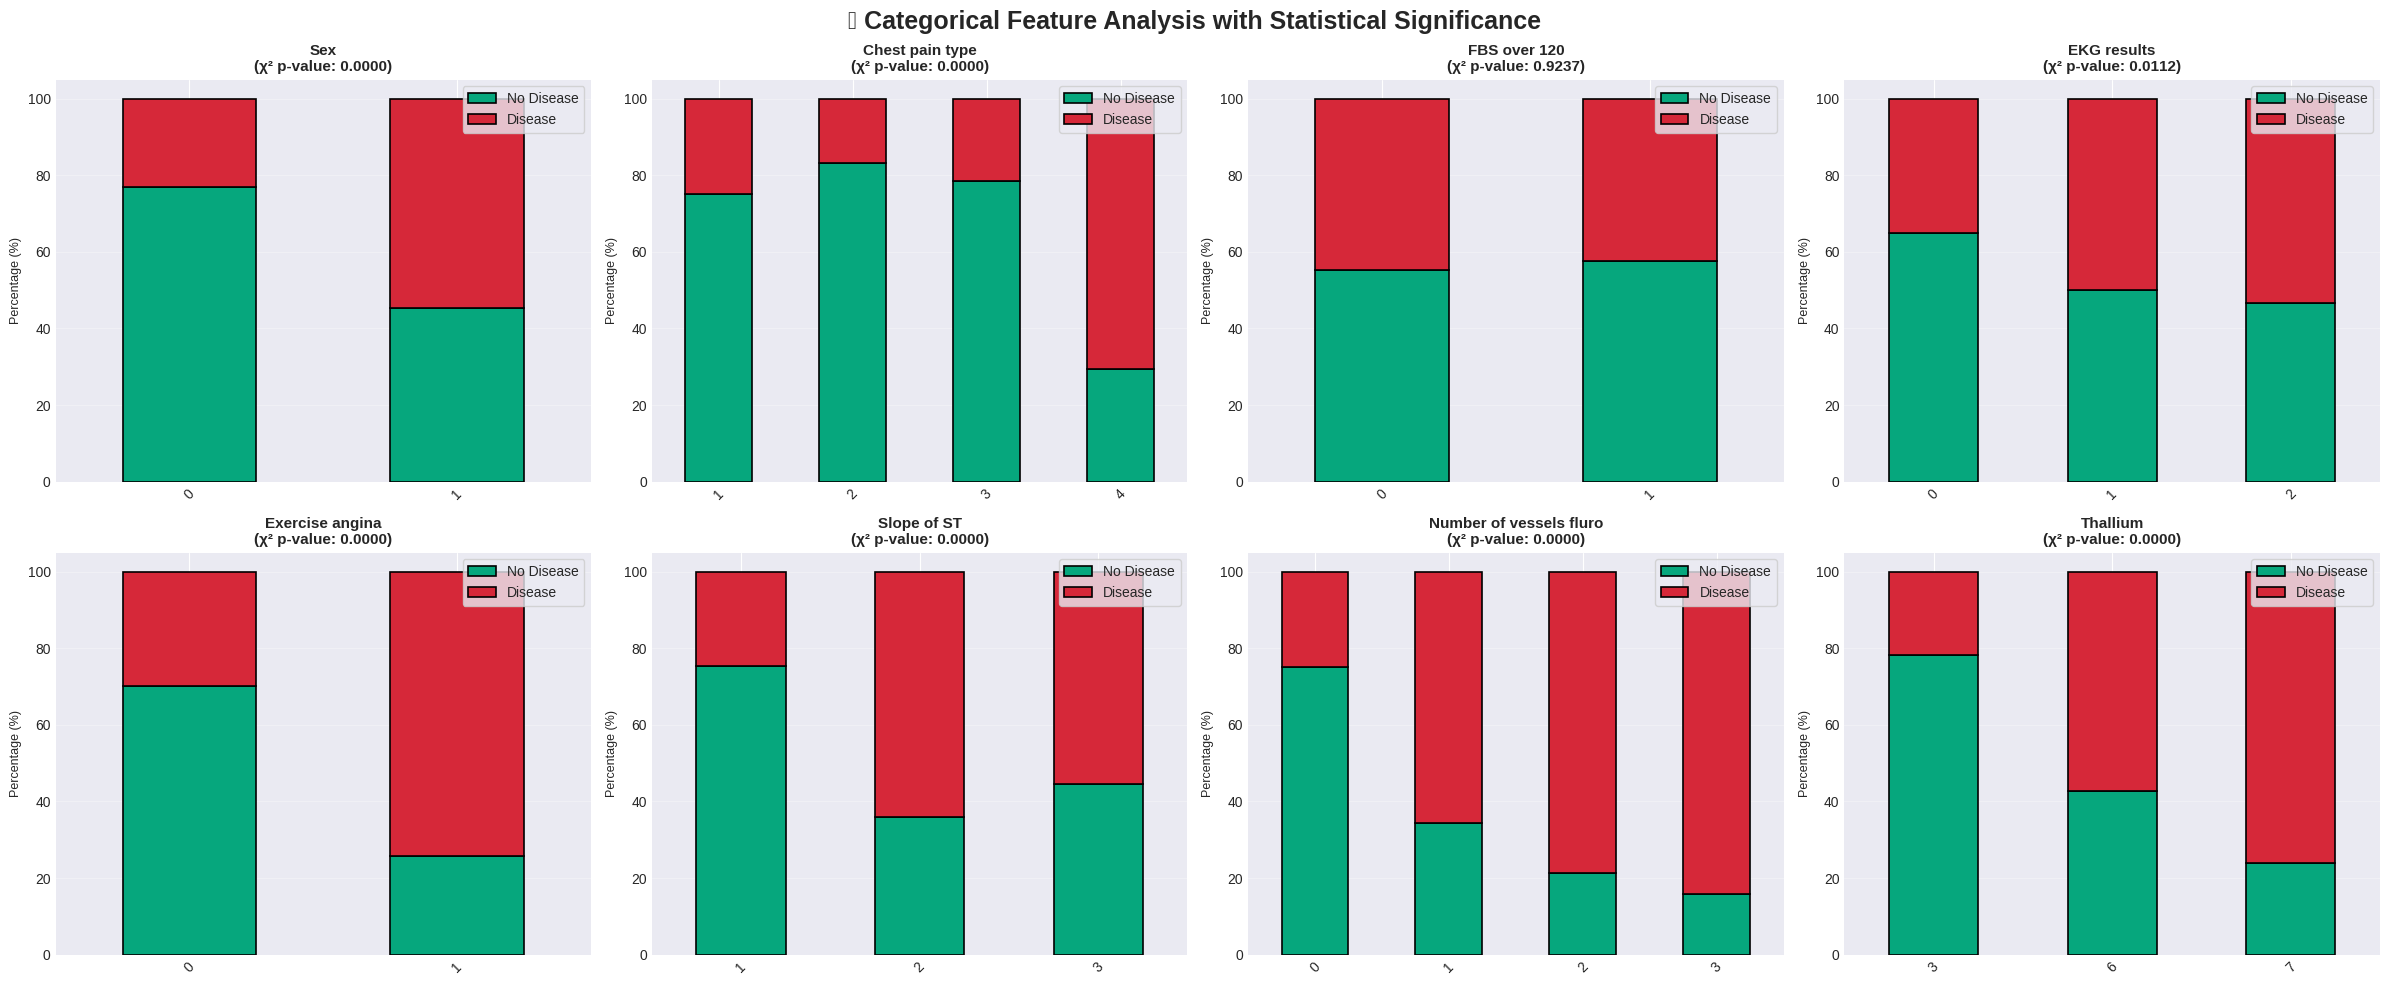

In [6]:
# Categorical Features Analysis with Chi-Square Tests
categorical_cols = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 
                    'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

fig, axes = plt.subplots(2, 4, figsize=(24, 10))
fig.suptitle('🔍 Categorical Feature Analysis with Statistical Significance', 
             fontsize=18, fontweight='bold')

axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    # Create contingency table
    contingency_table = pd.crosstab(df[col], df['Heart Disease'])
    
    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Normalized stacked bar chart
    contingency_pct = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    
    contingency_pct.plot(kind='bar', stacked=True, ax=axes[idx], 
                         color=[COLORS['success'], COLORS['danger']],
                         edgecolor='black', linewidth=1.2)
    
    axes[idx].set_title(f'{col}\n(χ² p-value: {p_value:.4f})', 
                        fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Percentage (%)', fontsize=9)
    axes[idx].set_xlabel('')
    axes[idx].legend(['No Disease', 'Disease'], loc='upper right', frameon=True)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Pairplot for Key Features

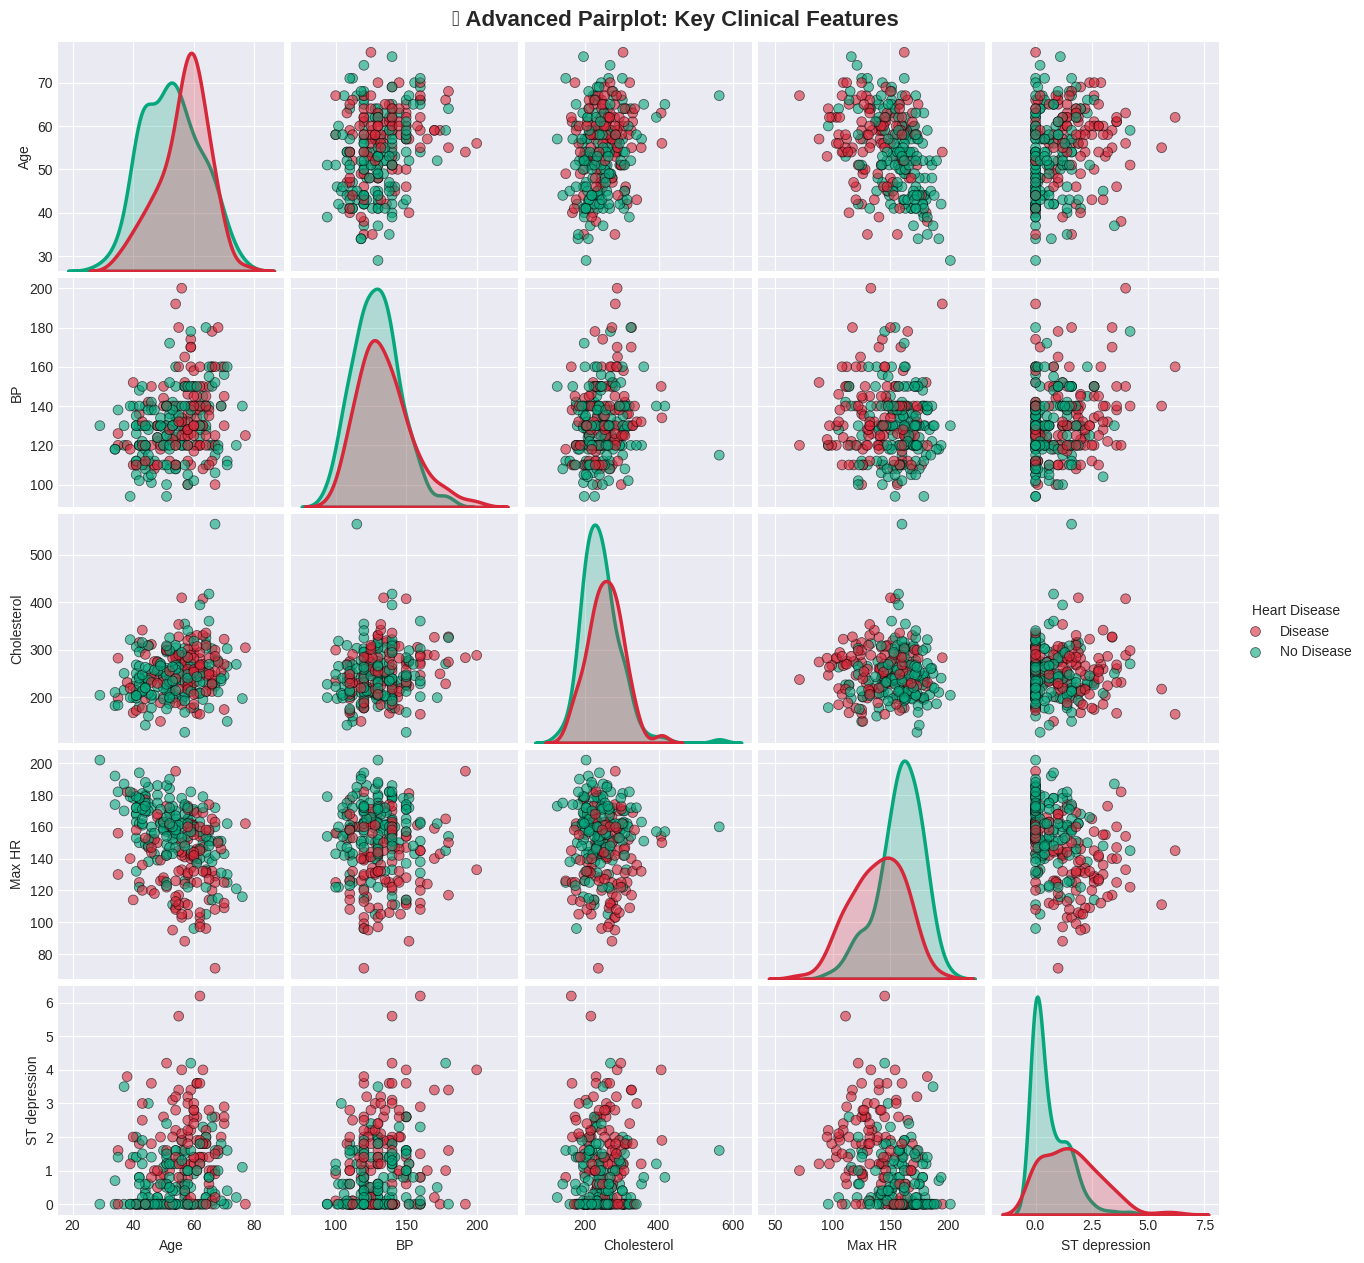

In [7]:
# Advanced Pairplot
key_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Heart Disease']
pairplot_df = df[key_features].copy()
pairplot_df['Heart Disease'] = pairplot_df['Heart Disease'].map({0: 'No Disease', 1: 'Disease'})

g = sns.pairplot(pairplot_df, hue='Heart Disease', 
                 palette={"No Disease": COLORS['success'], "Disease": COLORS['danger']},
                 plot_kws={'alpha': 0.6, 'edgecolor': 'black', 's': 50},
                 diag_kind='kde', diag_kws={'linewidth': 2.5})

g.fig.suptitle('🔬 Advanced Pairplot: Key Clinical Features', 
               fontsize=16, fontweight='bold', y=1.01)
plt.show()

### 3.5 Box Plots with Outlier Detection

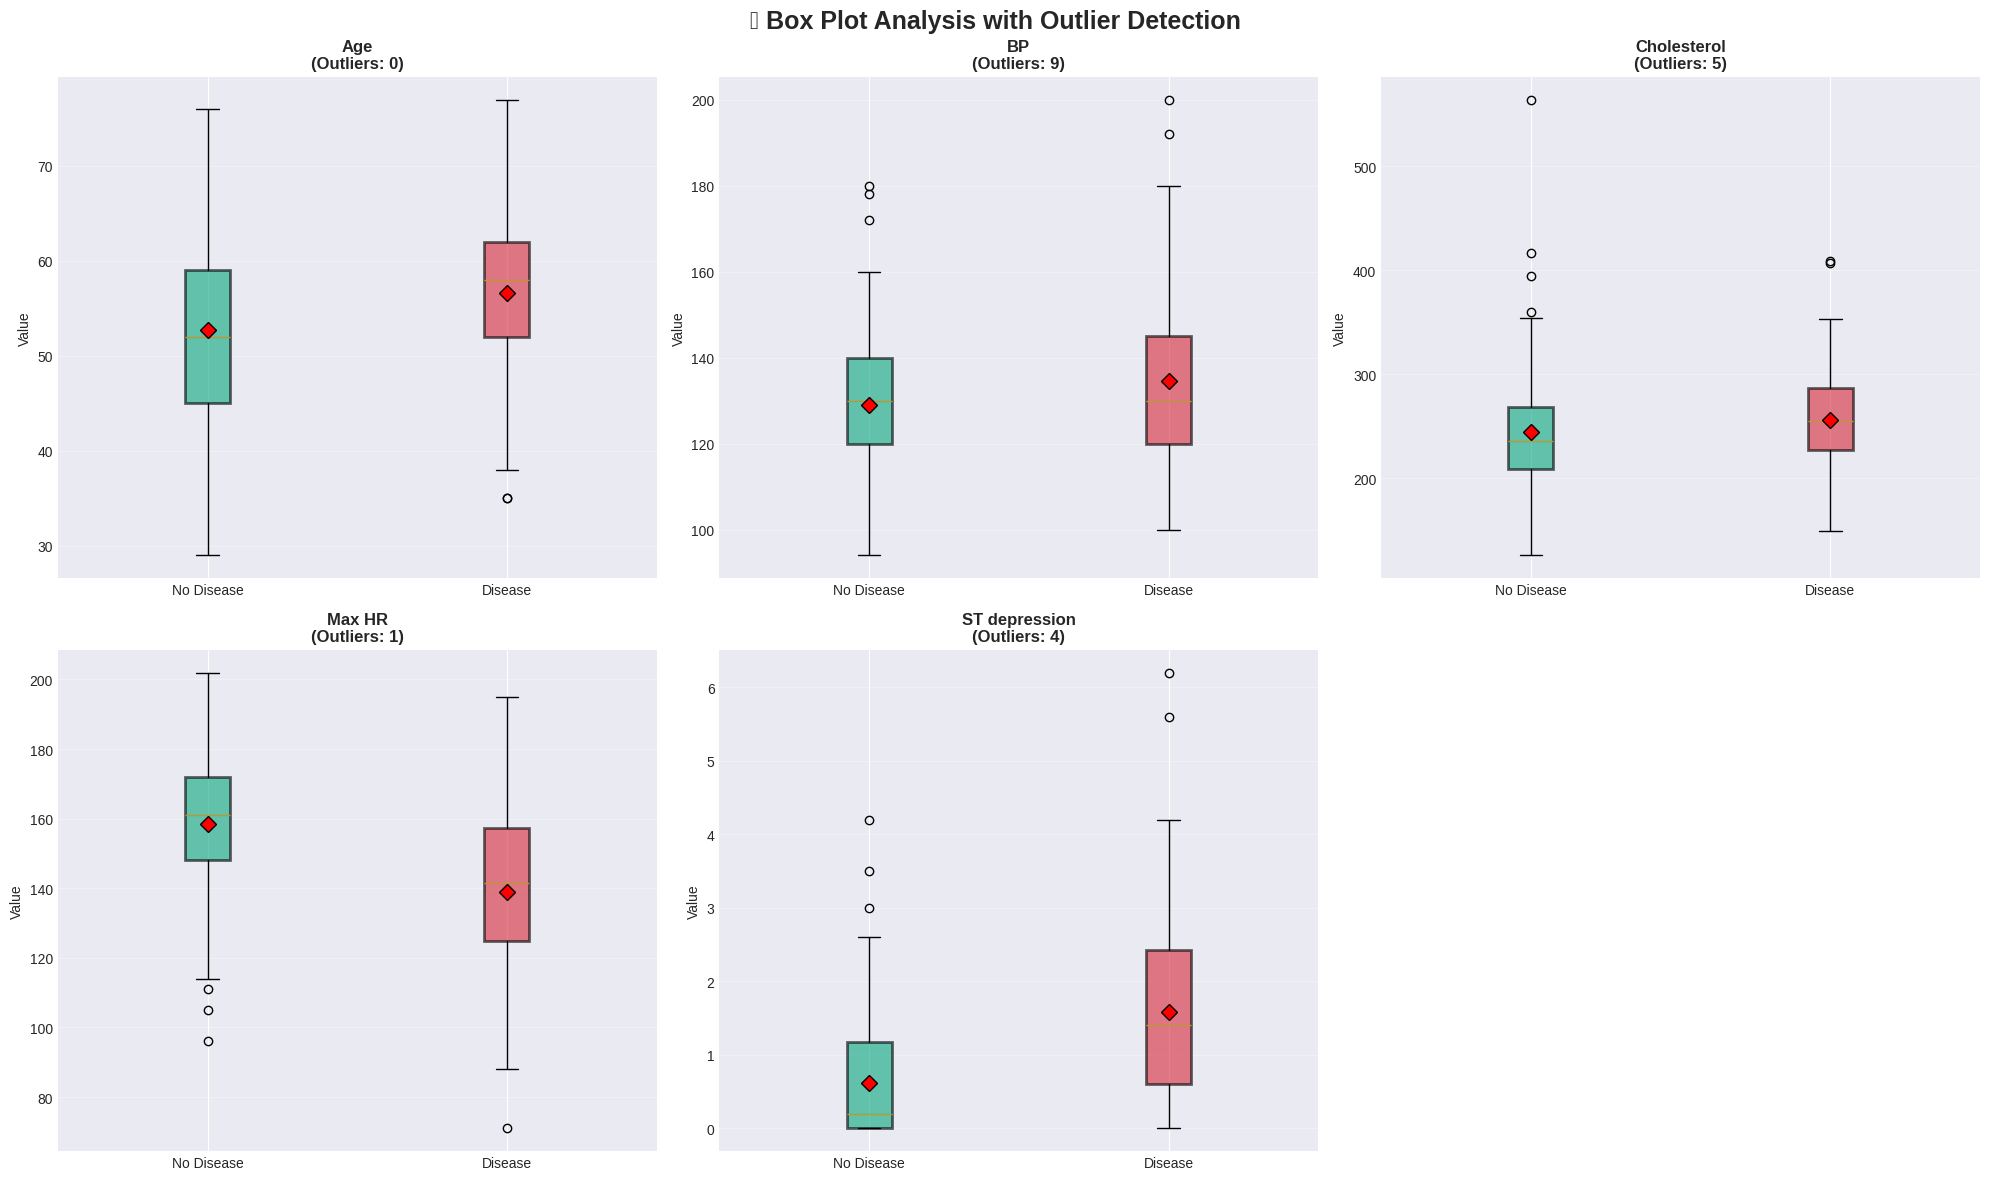

In [8]:
# Advanced Box Plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('📦 Box Plot Analysis with Outlier Detection', 
             fontsize=18, fontweight='bold')

numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

for idx, feature in enumerate(numerical_features):
    row = idx // 3
    col = idx % 3
    
    # Box plot
    box_data = [df[df['Heart Disease'] == 0][feature].dropna(),
                df[df['Heart Disease'] == 1][feature].dropna()]
    
    bp = axes[row, col].boxplot(box_data, labels=['No Disease', 'Disease'],
                                 patch_artist=True, showmeans=True,
                                 meanprops=dict(marker='D', markerfacecolor='red', 
                                              markeredgecolor='black', markersize=8))
    
    # Color boxes
    colors = [COLORS['success'], COLORS['danger']]
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
        patch.set_edgecolor('black')
        patch.set_linewidth(2)
    
    # Calculate outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))).sum()
    
    axes[row, col].set_title(f'{feature}\n(Outliers: {outliers})', 
                             fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Value', fontsize=10)
    axes[row, col].grid(axis='y', alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

## 4️⃣ Feature Engineering <a id='feature-engineering'></a>

In [10]:
import numpy as np
import pandas as pd

# Advanced Feature Engineering
df_engineered = df.copy()

print("🔧 Creating Advanced Features...\n")

# -------------------------------
# 1. Age-based features
# -------------------------------
df_engineered['Age_Group'] = pd.cut(
    df_engineered['Age'],
    bins=[-np.inf, 40, 50, 60, np.inf],
    labels=[0, 1, 2, 3],
    include_lowest=True
).astype(int)

df_engineered['Age_Squared'] = df_engineered['Age'] ** 2
df_engineered['Age_Log'] = np.log1p(df_engineered['Age'])

# -------------------------------
# 2. Cardiovascular risk score
# -------------------------------
df_engineered['CV_Risk_Score'] = (
    df_engineered['Age'] * 0.2 +
    df_engineered['BP'] * 0.3 +
    df_engineered['Cholesterol'] * 0.25 +
    (df_engineered['Max HR'].max() - df_engineered['Max HR']) * 0.25
)

# -------------------------------
# 3. BP features
# -------------------------------
df_engineered['BP_Category'] = pd.cut(
    df_engineered['BP'],
    bins=[-np.inf, 120, 130, 140, np.inf],
    labels=[0, 1, 2, 3],
    include_lowest=True
).astype(int)

df_engineered['BP_Squared'] = df_engineered['BP'] ** 2

df_engineered['BP_Normalized'] = (
    (df_engineered['BP'] - df_engineered['BP'].mean()) /
    df_engineered['BP'].std()
)

# -------------------------------
# 4. Cholesterol features
# -------------------------------
df_engineered['Chol_Category'] = pd.cut(
    df_engineered['Cholesterol'],
    bins=[-np.inf, 200, 240, np.inf],
    labels=[0, 1, 2],
    include_lowest=True
).astype(int)

df_engineered['Chol_Squared'] = df_engineered['Cholesterol'] ** 2
df_engineered['Chol_Log'] = np.log1p(df_engineered['Cholesterol'])

# -------------------------------
# 5. Heart rate features
# -------------------------------
df_engineered['Max_HR_Squared'] = df_engineered['Max HR'] ** 2

df_engineered['HR_BP_Ratio'] = (
    df_engineered['Max HR'] / (df_engineered['BP'] + 1)
)

df_engineered['HR_Age_Ratio'] = (
    df_engineered['Max HR'] / (df_engineered['Age'] + 1)
)

# -------------------------------
# 6. Interaction features
# -------------------------------
df_engineered['Age_BP_Interaction'] = (
    df_engineered['Age'] * df_engineered['BP']
)

df_engineered['Age_Chol_Interaction'] = (
    df_engineered['Age'] * df_engineered['Cholesterol']
)

df_engineered['BP_Chol_Interaction'] = (
    df_engineered['BP'] * df_engineered['Cholesterol']
)

df_engineered['ST_HR_Ratio'] = (
    df_engineered['ST depression'] /
    (df_engineered['Max HR'] + 1)
)

df_engineered['ST_Age_Product'] = (
    df_engineered['ST depression'] *
    df_engineered['Age']
)

# -------------------------------
# 7. Binary high-risk indicators
# -------------------------------
df_engineered['High_BP'] = (
    df_engineered['BP'] > 140
).astype(int)

df_engineered['High_Cholesterol'] = (
    df_engineered['Cholesterol'] > 240
).astype(int)

df_engineered['Low_Max_HR'] = (
    df_engineered['Max HR'] < 120
).astype(int)

df_engineered['High_ST_Depression'] = (
    df_engineered['ST depression'] > 1.5
).astype(int)

df_engineered['Elderly'] = (
    df_engineered['Age'] > 65
).astype(int)

# -------------------------------
# 8. Combined risk factors
# -------------------------------
df_engineered['Risk_Factor_Count'] = (
    df_engineered['High_BP'] +
    df_engineered['High_Cholesterol'] +
    df_engineered['Exercise angina'] +
    df_engineered['FBS over 120'] +
    df_engineered['Elderly']
)

# -------------------------------
# 9. Polynomial features
# -------------------------------
df_engineered['Age_BP_Poly'] = (
    df_engineered['Age'] *
    (df_engineered['BP'] ** 2)
)

df_engineered['Chol_HR_Poly'] = (
    df_engineered['Cholesterol'] *
    (df_engineered['Max HR'] ** 2)
)

# -------------------------------
# 10. Clinical composite score
# -------------------------------
df_engineered['Framingham_Score'] = (
    df_engineered['Age'] * 0.15 +
    df_engineered['Cholesterol'] * 0.01 +
    df_engineered['BP'] * 0.02 +
    df_engineered['Sex'] * 10 +
    df_engineered['FBS over 120'] * 5
)

# -------------------------------
# Summary
# -------------------------------
print("✅ Feature engineering complete!")
print("Total features:", df_engineered.shape[1])
print("New features:", df_engineered.shape[1] - df.shape[1])

new_features = [col for col in df_engineered.columns if col not in df.columns]
print("\n📝 First new features:", new_features[:10])


🔧 Creating Advanced Features...

✅ Feature engineering complete!
Total features: 41
New features: 27

📝 First new features: ['Age_Group', 'Age_Squared', 'Age_Log', 'CV_Risk_Score', 'BP_Category', 'BP_Squared', 'BP_Normalized', 'Chol_Category', 'Chol_Squared', 'Chol_Log']


### 4.1 Feature Importance Analysis

🎯 Running Feature Importance Analysis...



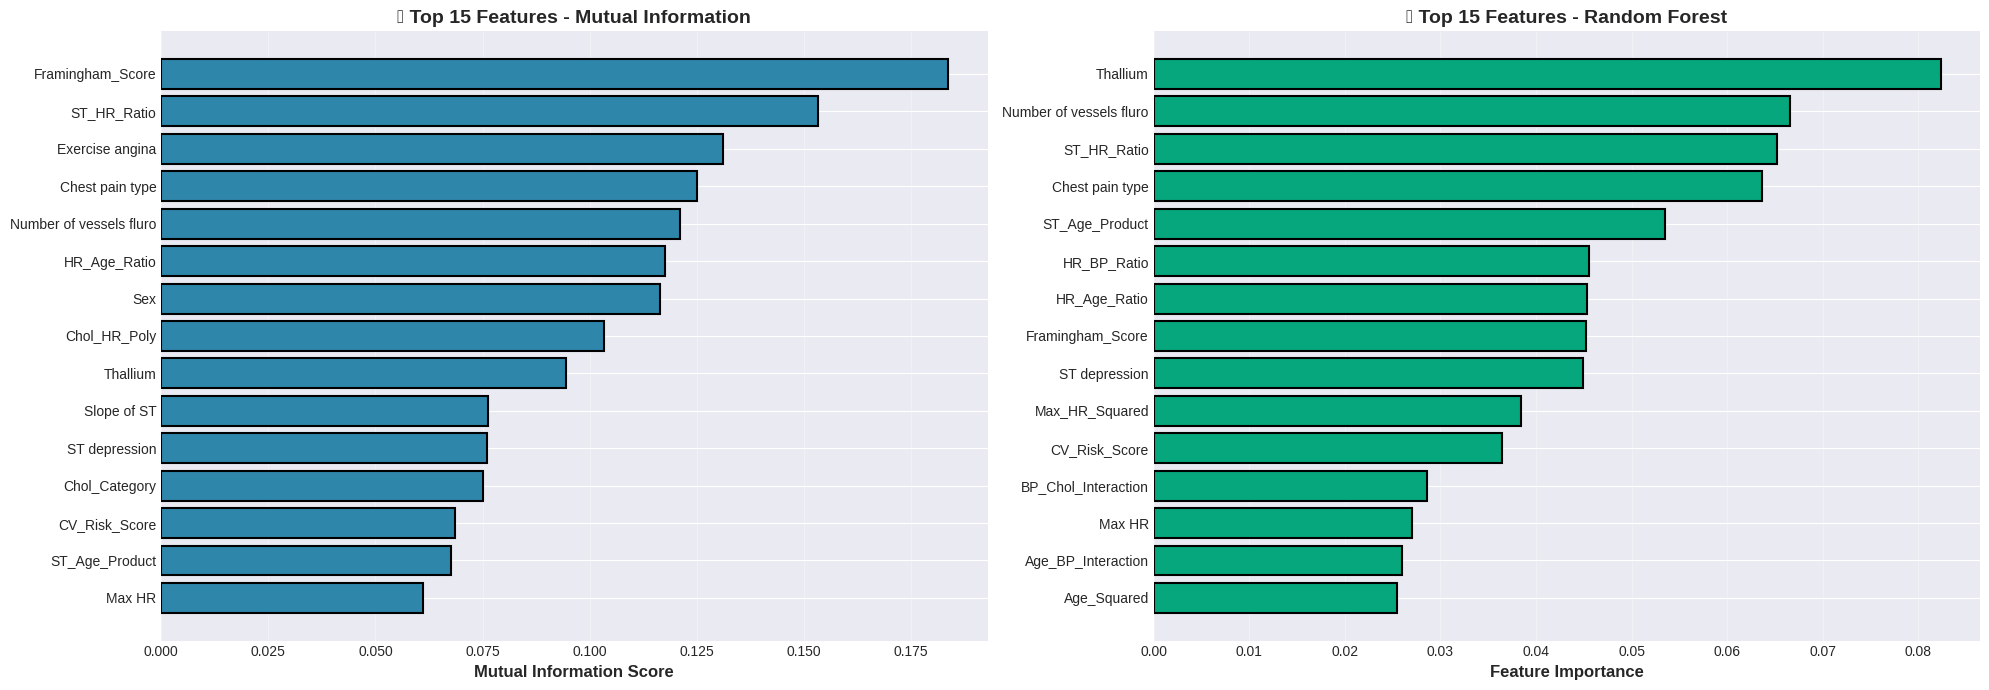


🔝 Top 10 Features (Mutual Information):
Framingham_Score           0.183671
ST_HR_Ratio                0.153313
Exercise angina            0.131050
Chest pain type            0.125033
Number of vessels fluro    0.121056
HR_Age_Ratio               0.117655
Sex                        0.116375
Chol_HR_Poly               0.103415
Thallium                   0.094462
Slope of ST                0.076248
dtype: float64


In [11]:
# Prepare data for feature selection
X = df_engineered.drop('Heart Disease', axis=1)
y = df_engineered['Heart Disease']

# Multiple feature selection methods
print("🎯 Running Feature Importance Analysis...\n")

# 1. Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=RANDOM_STATE)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# 2. Random Forest Feature Importance
rf_temp = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_temp.fit(X, y)
rf_importance = pd.Series(rf_temp.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Mutual Information
top_mi = mi_scores.head(15)
axes[0].barh(range(len(top_mi)), top_mi.values, 
             color=COLORS['primary'], edgecolor='black', linewidth=1.5)
axes[0].set_yticks(range(len(top_mi)))
axes[0].set_yticklabels(top_mi.index, fontsize=10)
axes[0].set_xlabel('Mutual Information Score', fontsize=12, fontweight='bold')
axes[0].set_title('📊 Top 15 Features - Mutual Information', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Random Forest Importance
top_rf = rf_importance.head(15)
axes[1].barh(range(len(top_rf)), top_rf.values, 
             color=COLORS['success'], edgecolor='black', linewidth=1.5)
axes[1].set_yticks(range(len(top_rf)))
axes[1].set_yticklabels(top_rf.index, fontsize=10)
axes[1].set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
axes[1].set_title('🌲 Top 15 Features - Random Forest', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔝 Top 10 Features (Mutual Information):")
print(mi_scores.head(10))

## 5️⃣ Data Preparation & SMOTE <a id='training'></a>

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"📊 Dataset Split:")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())

# Apply SMOTE to handle class imbalance
print("\n⚖️ Applying SMOTE for class balancing...")
smote = SMOTE(random_state=RANDOM_STATE)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\n✅ After SMOTE:")
print(f"Training set shape: {X_train_balanced.shape}")
print(f"Class distribution:")
print(pd.Series(y_train_balanced).value_counts())

# Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Feature scaling complete!")

📊 Dataset Split:
Training set: (216, 40)
Test set: (54, 40)

Class distribution in training set:
Heart Disease
0    120
1     96
Name: count, dtype: int64

⚖️ Applying SMOTE for class balancing...

✅ After SMOTE:
Training set shape: (240, 40)
Class distribution:
Heart Disease
0    120
1    120
Name: count, dtype: int64

✅ Feature scaling complete!


## 6️⃣ Multi-Model Training & Comparison

In [13]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=RANDOM_STATE, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(n_estimators=100, random_state=RANDOM_STATE, verbose=-1),
    'SVM': SVC(probability=True, random_state=RANDOM_STATE),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate all models
results = []
model_objects = {}

print("🚀 Training multiple models...\n")
print("="*100)

for name, model in models.items():
    print(f"\n📦 Training {name}...")
    
    # Train
    model.fit(X_train_scaled, y_train_balanced)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 0
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train_balanced, 
                                cv=5, scoring='accuracy')
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })
    
    model_objects[name] = model
    
    print(f"   ✓ Accuracy: {accuracy:.4f} | F1-Score: {f1:.4f} | ROC-AUC: {roc_auc:.4f}")

# Results DataFrame
results_df = pd.DataFrame(results).sort_values('ROC-AUC', ascending=False)

print("\n" + "="*100)
print("\n📊 MODEL COMPARISON RESULTS:\n")
display(results_df.style.background_gradient(cmap='RdYlGn', subset=['Accuracy', 'F1-Score', 'ROC-AUC'])
                        .format(precision=4))

🚀 Training multiple models...


📦 Training Logistic Regression...
   ✓ Accuracy: 0.8148 | F1-Score: 0.8148 | ROC-AUC: 0.9056

📦 Training Random Forest...
   ✓ Accuracy: 0.8333 | F1-Score: 0.8302 | ROC-AUC: 0.8979

📦 Training Gradient Boosting...
   ✓ Accuracy: 0.7778 | F1-Score: 0.7692 | ROC-AUC: 0.8833

📦 Training XGBoost...
   ✓ Accuracy: 0.7778 | F1-Score: 0.7692 | ROC-AUC: 0.8889

📦 Training LightGBM...
   ✓ Accuracy: 0.8148 | F1-Score: 0.8000 | ROC-AUC: 0.9028

📦 Training SVM...
   ✓ Accuracy: 0.8519 | F1-Score: 0.8462 | ROC-AUC: 0.8792

📦 Training KNN...
   ✓ Accuracy: 0.7593 | F1-Score: 0.7547 | ROC-AUC: 0.8125

📦 Training Naive Bayes...
   ✓ Accuracy: 0.7778 | F1-Score: 0.7692 | ROC-AUC: 0.8597


📊 MODEL COMPARISON RESULTS:



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,CV Mean,CV Std
0,Logistic Regression,0.8148,0.7333,0.9167,0.8148,0.9056,0.8250,0.0850
4,LightGBM,0.8148,0.7692,0.8333,0.8000,0.9028,0.8208,0.0386
1,Random Forest,0.8333,0.7586,0.9167,0.8302,0.8979,0.8208,0.0312
3,XGBoost,0.7778,0.7143,0.8333,0.7692,0.8889,0.8167,0.0333
2,Gradient Boosting,0.7778,0.7143,0.8333,0.7692,0.8833,0.8000,0.0752
5,SVM,0.8519,0.7857,0.9167,0.8462,0.8792,0.8000,0.0486
7,Naive Bayes,0.7778,0.7143,0.8333,0.7692,0.8597,0.7583,0.0598
6,KNN,0.7593,0.6897,0.8333,0.7547,0.8125,0.8000,0.0283


### 6.1 Model Performance Visualization

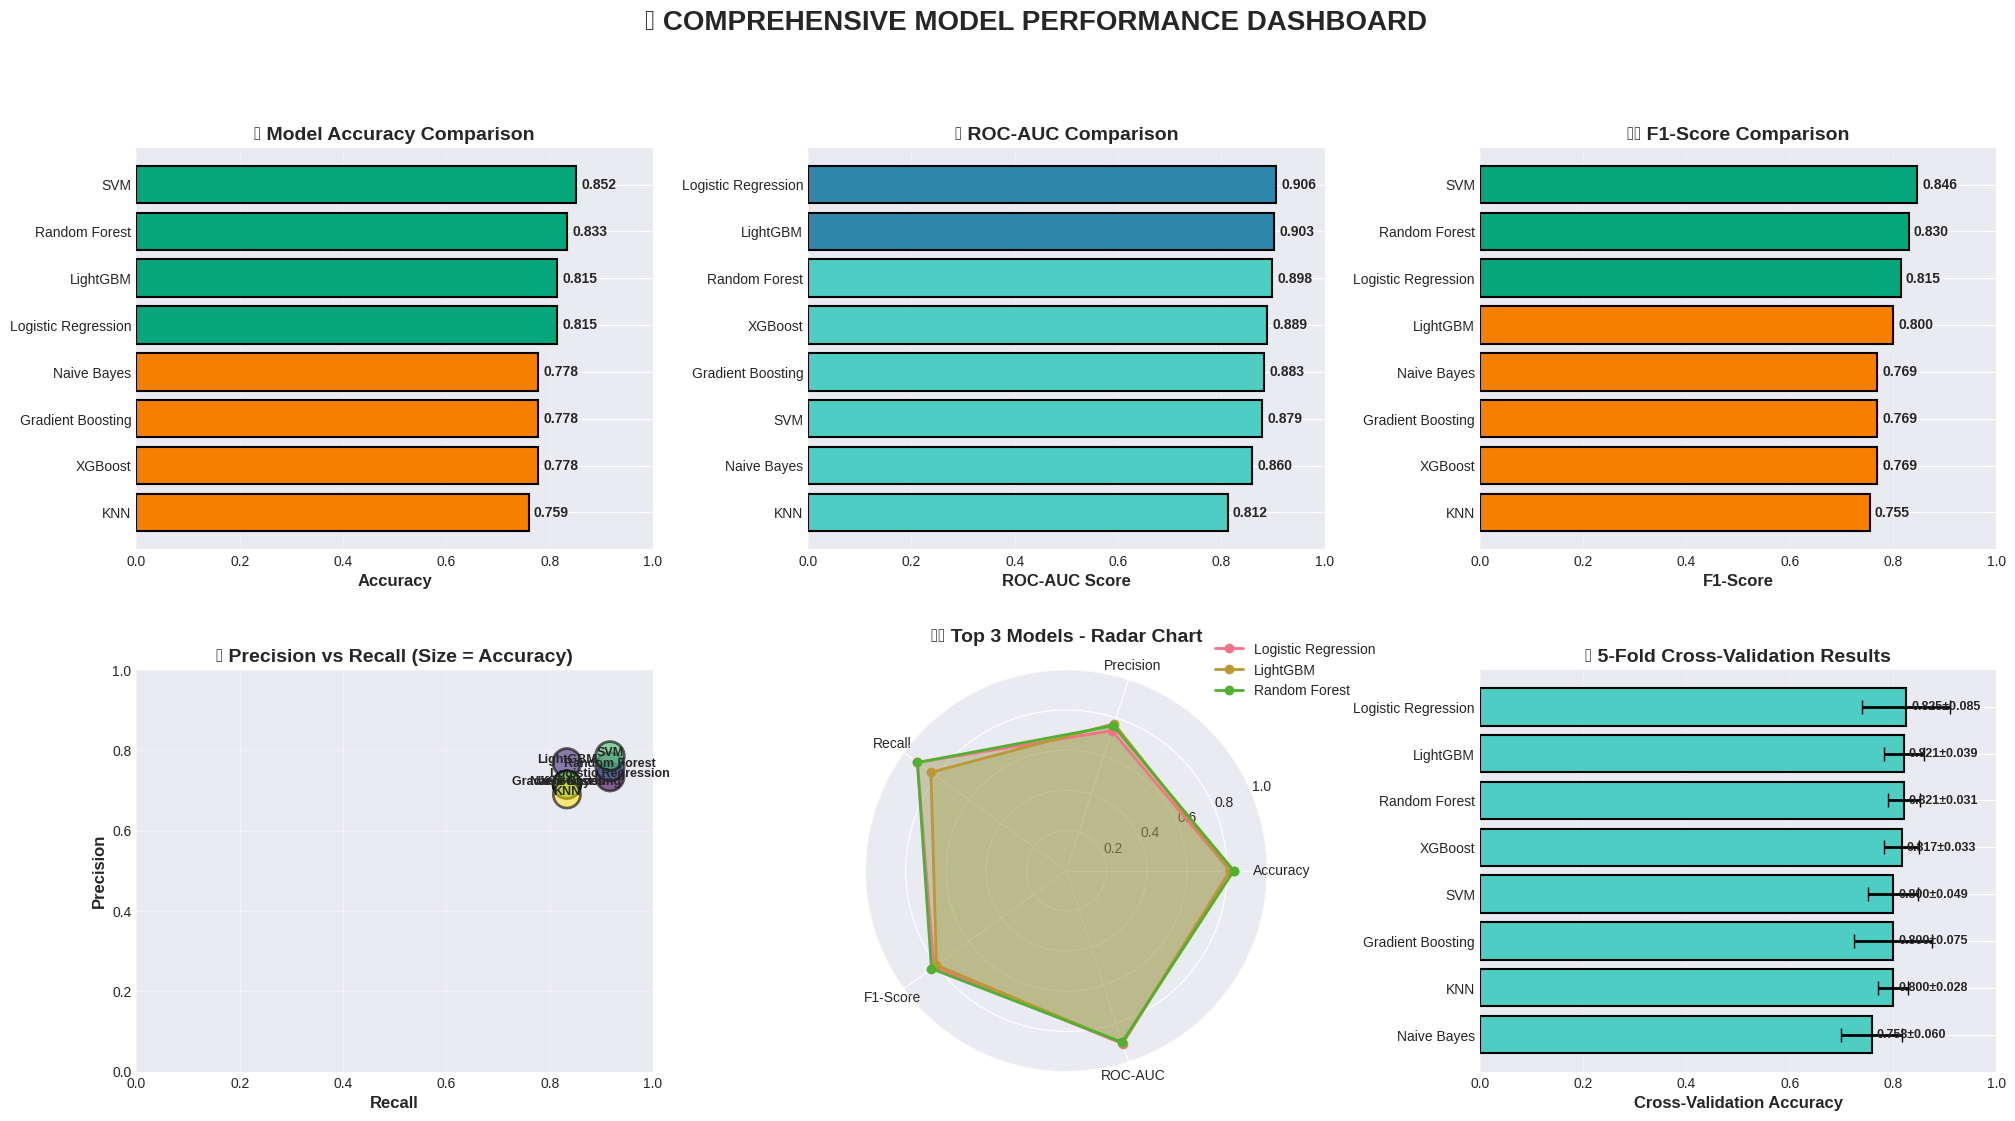

In [14]:
# Professional Model Comparison Dashboard
fig = plt.figure(figsize=(24, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Accuracy Comparison
ax1 = fig.add_subplot(gs[0, 0])
sorted_df = results_df.sort_values('Accuracy')
colors_acc = [COLORS['success'] if x > 0.8 else COLORS['warning'] if x > 0.7 else COLORS['danger'] 
              for x in sorted_df['Accuracy']]
ax1.barh(sorted_df['Model'], sorted_df['Accuracy'], color=colors_acc, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('🎯 Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 1)
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(sorted_df['Accuracy']):
    ax1.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# 2. ROC-AUC Comparison
ax2 = fig.add_subplot(gs[0, 1])
sorted_df_roc = results_df.sort_values('ROC-AUC')
colors_roc = [COLORS['primary'] if x > 0.9 else COLORS['info'] if x > 0.8 else COLORS['warning'] 
              for x in sorted_df_roc['ROC-AUC']]
ax2.barh(sorted_df_roc['Model'], sorted_df_roc['ROC-AUC'], color=colors_roc, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('ROC-AUC Score', fontsize=12, fontweight='bold')
ax2.set_title('📈 ROC-AUC Comparison', fontsize=14, fontweight='bold')
ax2.set_xlim(0, 1)
ax2.grid(axis='x', alpha=0.3)
for i, v in enumerate(sorted_df_roc['ROC-AUC']):
    ax2.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# 3. F1-Score Comparison
ax3 = fig.add_subplot(gs[0, 2])
sorted_df_f1 = results_df.sort_values('F1-Score')
colors_f1 = [COLORS['success'] if x > 0.8 else COLORS['warning'] if x > 0.7 else COLORS['danger'] 
             for x in sorted_df_f1['F1-Score']]
ax3.barh(sorted_df_f1['Model'], sorted_df_f1['F1-Score'], color=colors_f1, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('F1-Score', fontsize=12, fontweight='bold')
ax3.set_title('⚖️ F1-Score Comparison', fontsize=14, fontweight='bold')
ax3.set_xlim(0, 1)
ax3.grid(axis='x', alpha=0.3)
for i, v in enumerate(sorted_df_f1['F1-Score']):
    ax3.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# 4. Precision vs Recall
ax4 = fig.add_subplot(gs[1, 0])
scatter = ax4.scatter(results_df['Recall'], results_df['Precision'], 
                      s=results_df['Accuracy']*500, alpha=0.6,
                      c=range(len(results_df)), cmap='viridis', edgecolor='black', linewidth=2)
for idx, row in results_df.iterrows():
    ax4.annotate(row['Model'], (row['Recall'], row['Precision']), 
                fontsize=9, ha='center', fontweight='bold')
ax4.set_xlabel('Recall', fontsize=12, fontweight='bold')
ax4.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax4.set_title('🎯 Precision vs Recall (Size = Accuracy)', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)

# 5. Radar Chart for Top 3 Models
ax5 = fig.add_subplot(gs[1, 1], projection='polar')
top_3_models = results_df.head(3)
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for idx, row in top_3_models.iterrows():
    values = row[categories].tolist()
    values += values[:1]
    ax5.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax5.fill(angles, values, alpha=0.25)

ax5.set_xticks(angles[:-1])
ax5.set_xticklabels(categories, fontsize=10)
ax5.set_ylim(0, 1)
ax5.set_title('🕸️ Top 3 Models - Radar Chart', fontsize=14, fontweight='bold', pad=20)
ax5.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax5.grid(True)

# 6. Cross-Validation Scores
ax6 = fig.add_subplot(gs[1, 2])
sorted_cv = results_df.sort_values('CV Mean')
ax6.barh(sorted_cv['Model'], sorted_cv['CV Mean'], 
         xerr=sorted_cv['CV Std'], color=COLORS['info'], 
         edgecolor='black', linewidth=1.5, capsize=5, error_kw={'linewidth': 2})
ax6.set_xlabel('Cross-Validation Accuracy', fontsize=12, fontweight='bold')
ax6.set_title('📊 5-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
ax6.set_xlim(0, 1)
ax6.grid(axis='x', alpha=0.3)
for i, (mean, std) in enumerate(zip(sorted_cv['CV Mean'], sorted_cv['CV Std'])):
    ax6.text(mean + 0.01, i, f'{mean:.3f}±{std:.3f}', va='center', fontsize=9, fontweight='bold')

plt.suptitle('🏆 COMPREHENSIVE MODEL PERFORMANCE DASHBOARD', 
             fontsize=20, fontweight='bold', y=0.995)
plt.show()

### 6.2 ROC Curves - All Models

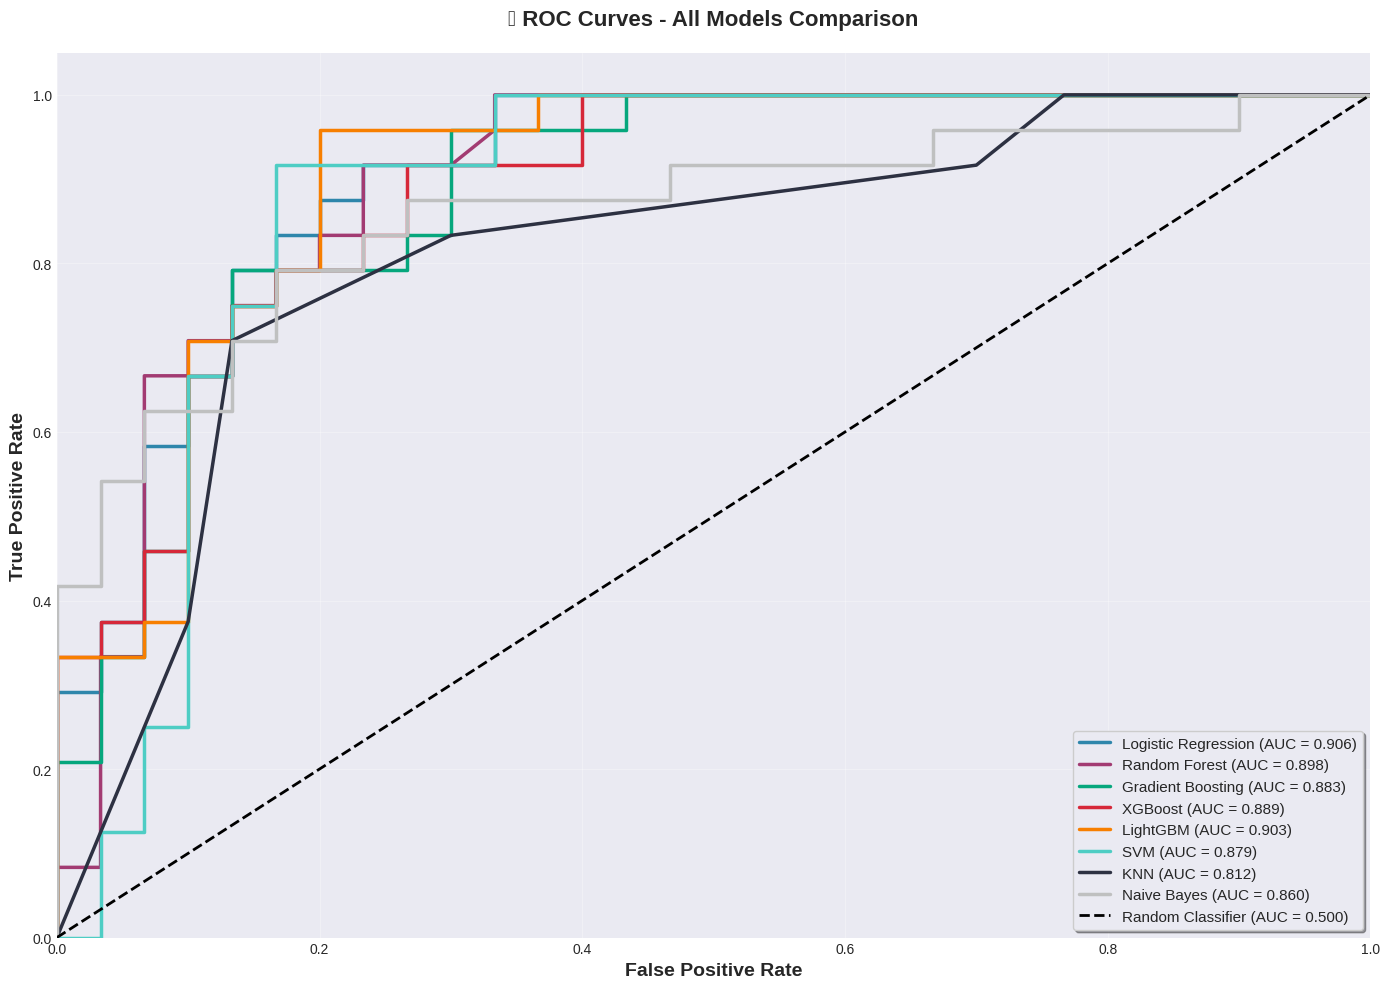

In [15]:
# Professional ROC Curves
plt.figure(figsize=(14, 10))

colors_list = list(COLORS.values())

for idx, (name, model) in enumerate(model_objects.items()):
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, linewidth=2.5, 
                color=colors_list[idx % len(colors_list)],
                label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('📈 ROC Curves - All Models Comparison', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc="lower right", fontsize=11, frameon=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 6.3 Confusion Matrices - Top 4 Models

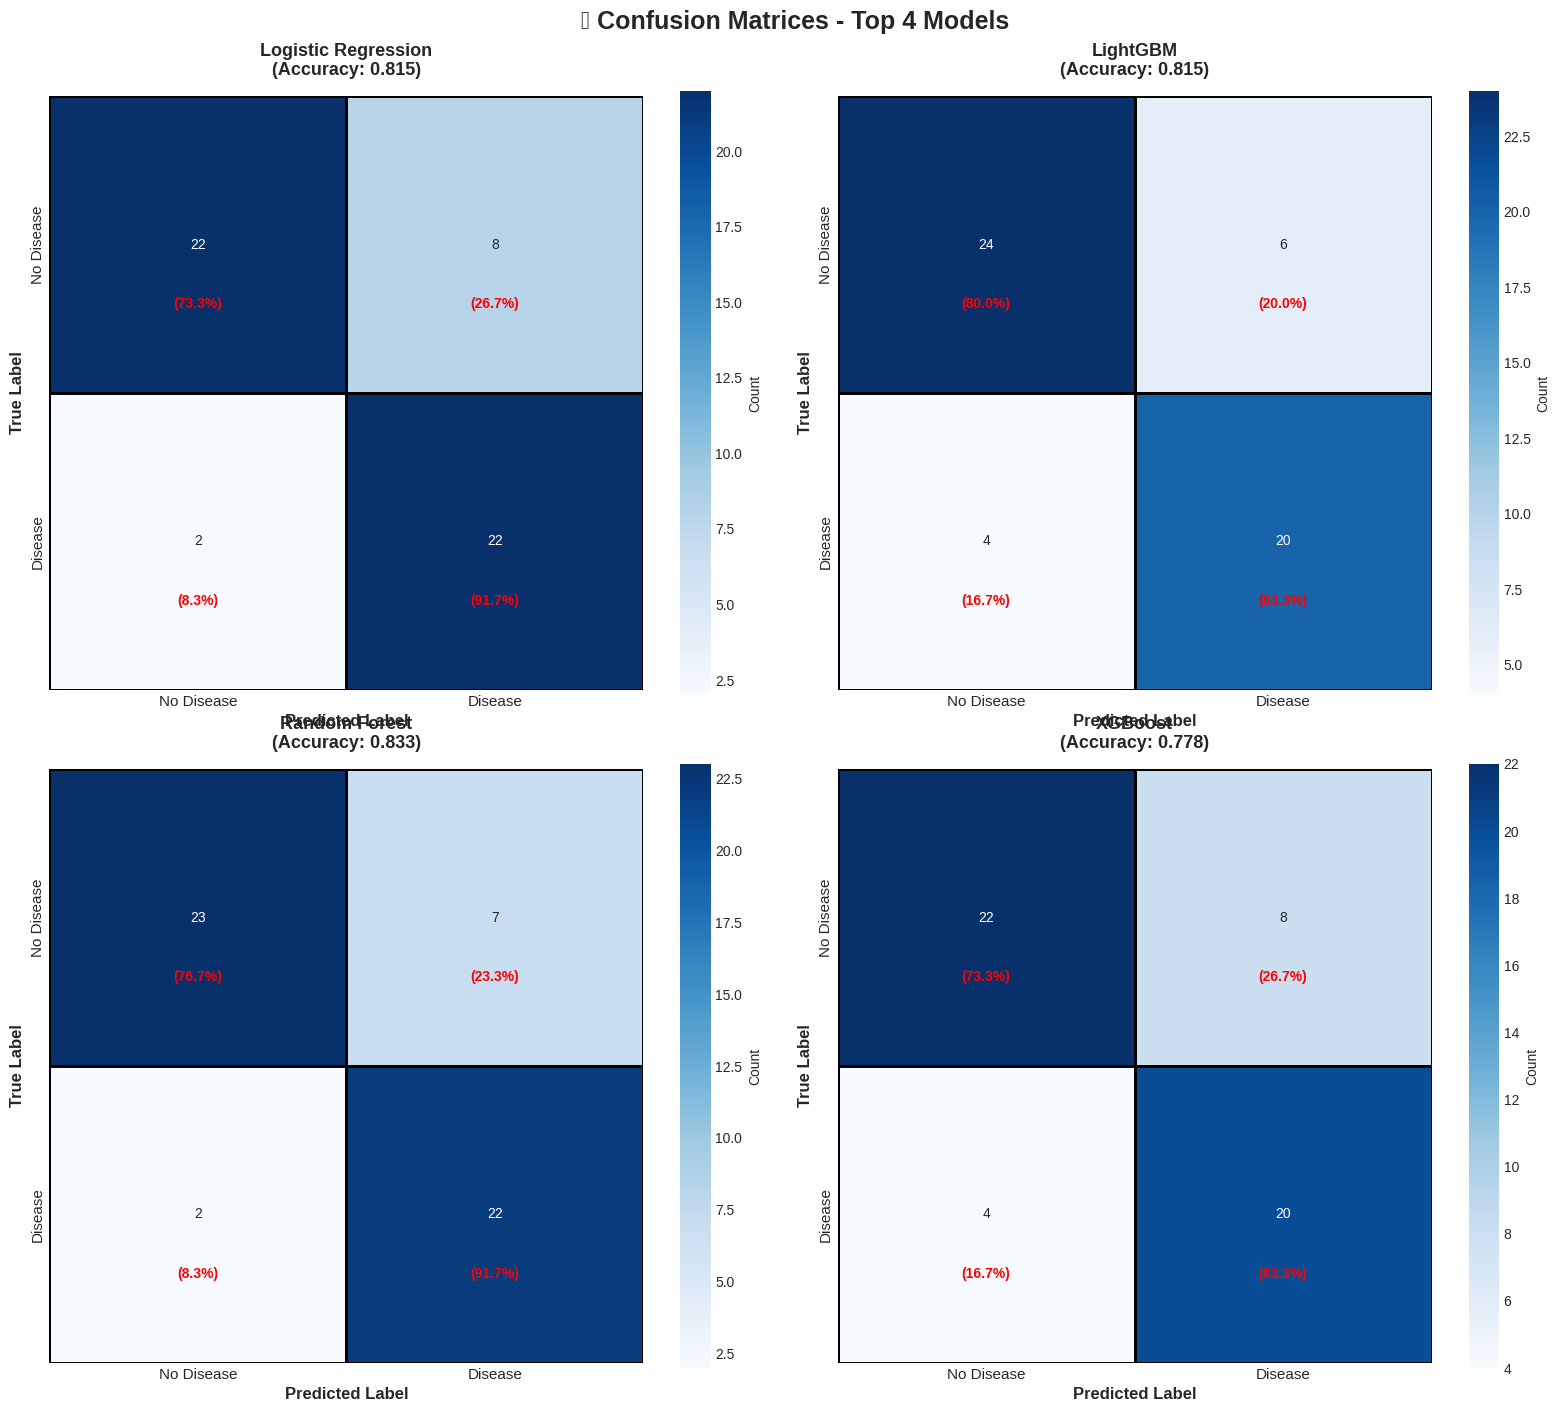

In [16]:
# Advanced Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

top_4_models = results_df.head(4)['Model'].tolist()

for idx, model_name in enumerate(top_4_models):
    model = model_objects[model_name]
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
                cbar_kws={'label': 'Count'}, ax=axes[idx],
                linewidths=2, linecolor='black')
    
    # Add percentage annotations
    for i in range(2):
        for j in range(2):
            text = axes[idx].text(j + 0.5, i + 0.7, 
                                 f'({cm_normalized[i, j]*100:.1f}%)',
                                 ha="center", va="center", 
                                 color="red", fontsize=10, fontweight='bold')
    
    axes[idx].set_ylabel('True Label', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    axes[idx].set_title(f'{model_name}\n(Accuracy: {results_df[results_df["Model"]==model_name]["Accuracy"].values[0]:.3f})', 
                       fontsize=13, fontweight='bold', pad=15)
    axes[idx].set_xticklabels(['No Disease', 'Disease'], fontsize=11)
    axes[idx].set_yticklabels(['No Disease', 'Disease'], fontsize=11)

plt.suptitle('🔍 Confusion Matrices - Top 4 Models', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### 6.4 Precision-Recall Curves

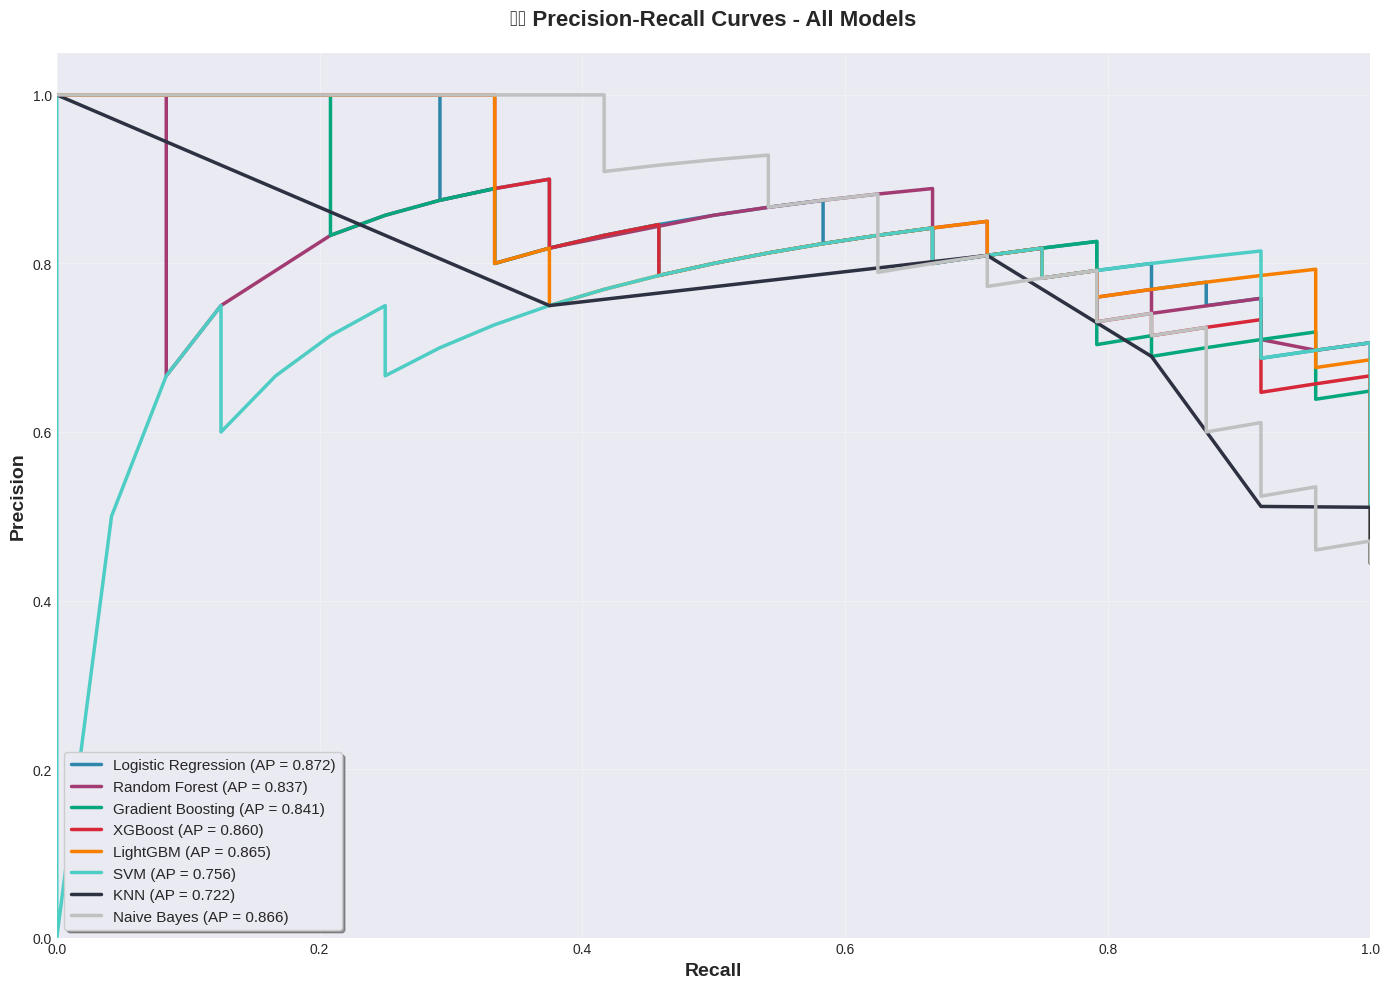

In [17]:
# Precision-Recall Curves
plt.figure(figsize=(14, 10))

for idx, (name, model) in enumerate(model_objects.items()):
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        avg_precision = average_precision_score(y_test, y_pred_proba)
        
        plt.plot(recall, precision, linewidth=2.5,
                color=colors_list[idx % len(colors_list)],
                label=f'{name} (AP = {avg_precision:.3f})')

plt.xlabel('Recall', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('⚖️ Precision-Recall Curves - All Models', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc="lower left", fontsize=11, frameon=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

## 7️⃣ SHAP Explainability Analysis <a id='explainability'></a>

In [18]:
# Select best model for SHAP analysis
best_model_name = results_df.iloc[0]['Model']
best_model = model_objects[best_model_name]

print(f"🎯 Analyzing {best_model_name} with SHAP...\n")

# Create SHAP explainer
# Use a sample for faster computation
X_sample = X_test_scaled[:100]

if 'Tree' in best_model_name or 'Forest' in best_model_name or 'Gradient' in best_model_name or 'XGB' in best_model_name or 'LightGBM' in best_model_name:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_sample)
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # For binary classification
else:
    explainer = shap.KernelExplainer(best_model.predict_proba, shap.sample(X_train_scaled, 100))
    shap_values = explainer.shap_values(X_sample)
    if isinstance(shap_values, list):
        shap_values = shap_values[1]

print("✅ SHAP values computed!")

🎯 Analyzing Logistic Regression with SHAP...



  0%|          | 0/54 [00:00<?, ?it/s]

✅ SHAP values computed!


<Figure size 1400x1000 with 0 Axes>

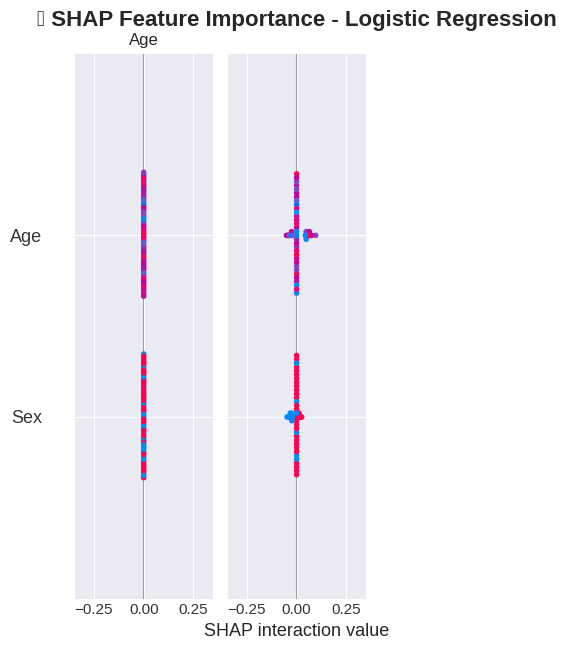

In [19]:
# SHAP Summary Plot
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_sample, feature_names=X.columns, 
                  plot_type="dot", show=False)
plt.title(f'🔍 SHAP Feature Importance - {best_model_name}', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

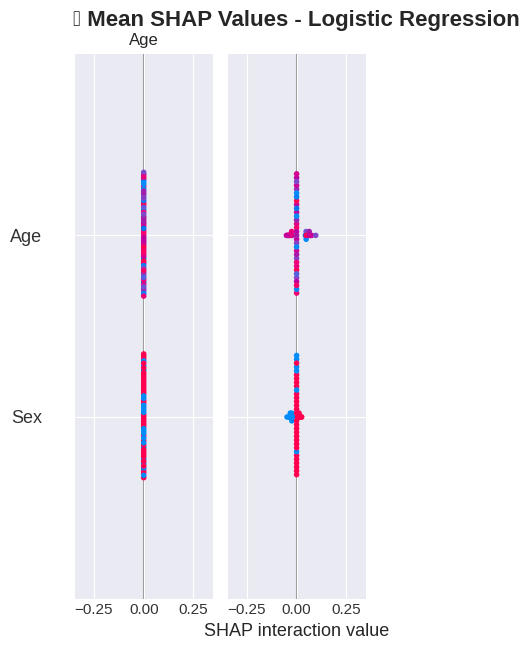

In [20]:
# SHAP Bar Plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_sample, feature_names=X.columns, 
                  plot_type="bar", show=False)
plt.title(f'📊 Mean SHAP Values - {best_model_name}', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 8️⃣ Learning Curves <a id='dashboards'></a>

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

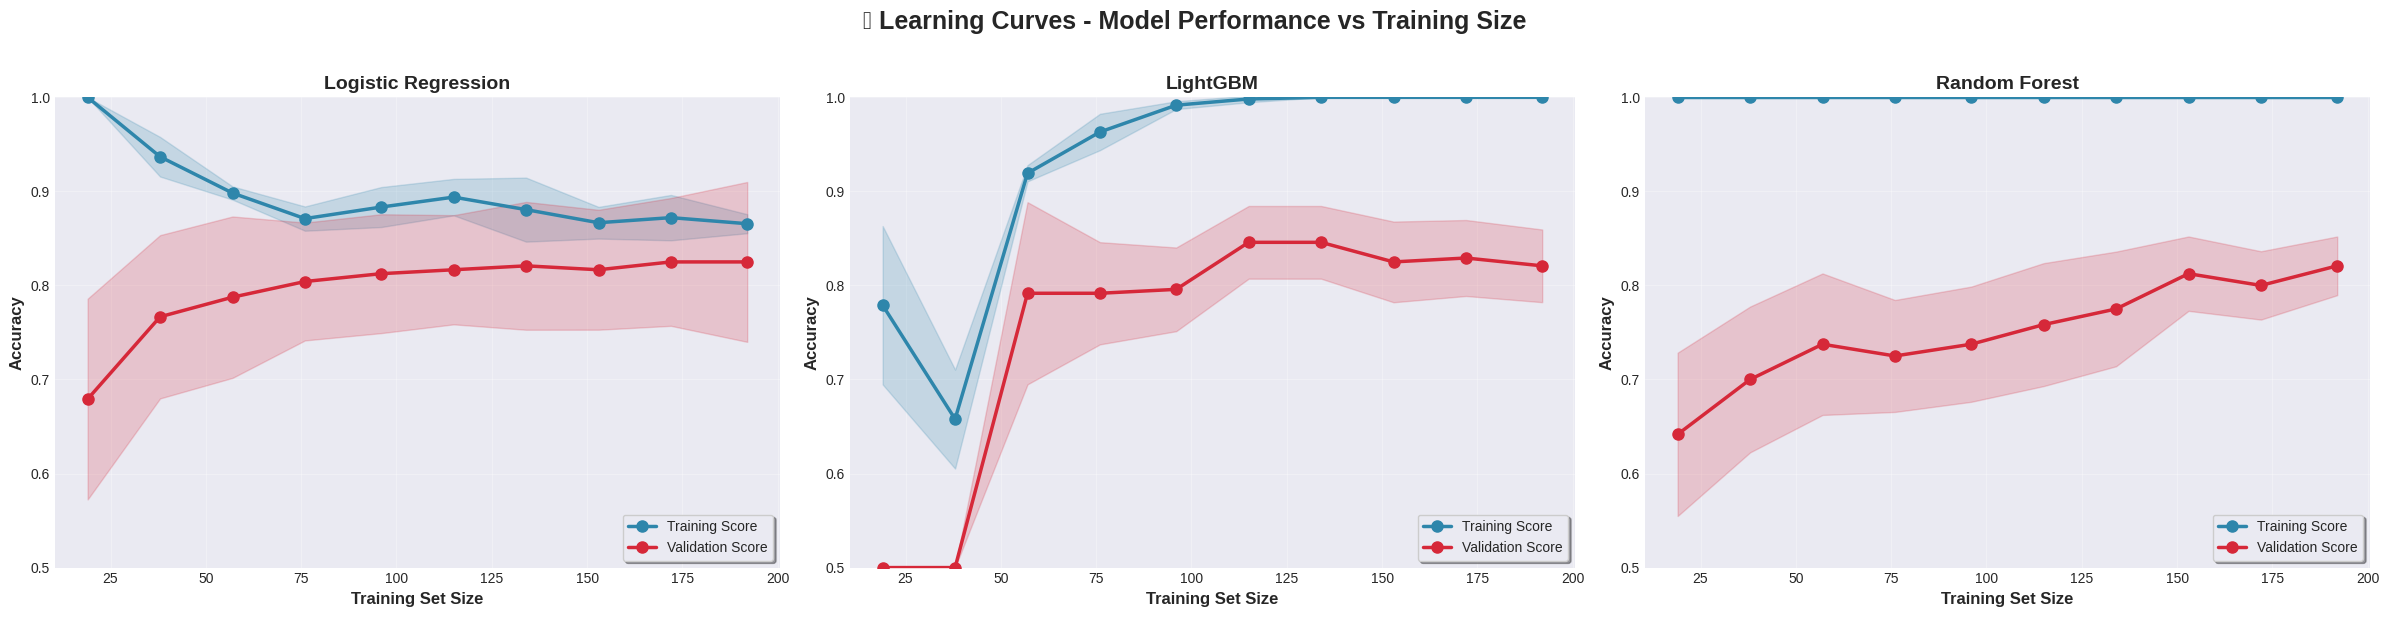

In [21]:
# Learning Curves for Top 3 Models
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

top_3_models = results_df.head(3)['Model'].tolist()

for idx, model_name in enumerate(top_3_models):
    model = model_objects[model_name]
    
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train_scaled, y_train_balanced, 
        cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    axes[idx].plot(train_sizes, train_mean, 'o-', color=COLORS['primary'], 
                   linewidth=2.5, markersize=8, label='Training Score')
    axes[idx].fill_between(train_sizes, train_mean - train_std, 
                           train_mean + train_std, alpha=0.2, color=COLORS['primary'])
    
    axes[idx].plot(train_sizes, val_mean, 'o-', color=COLORS['danger'], 
                   linewidth=2.5, markersize=8, label='Validation Score')
    axes[idx].fill_between(train_sizes, val_mean - val_std, 
                           val_mean + val_std, alpha=0.2, color=COLORS['danger'])
    
    axes[idx].set_xlabel('Training Set Size', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    axes[idx].set_title(f'{model_name}', fontsize=14, fontweight='bold')
    axes[idx].legend(loc='lower right', fontsize=10, frameon=True, shadow=True)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim(0.5, 1.0)

plt.suptitle('📈 Learning Curves - Model Performance vs Training Size', 
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 9️⃣ Hyperparameter Tuning (Best Model)

In [22]:
# Hyperparameter tuning for the best model
print(f"🎯 Performing hyperparameter tuning for {best_model_name}...\n")

# Define parameter grid based on best model
if 'Random Forest' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    base_model = RandomForestClassifier(random_state=RANDOM_STATE)
    
elif 'XGBoost' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    }
    base_model = xgb.XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss')
    
elif 'Gradient' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    }
    base_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
    
else:
    print(f"⚠️ Skipping hyperparameter tuning for {best_model_name}")
    param_grid = None
    base_model = None

# Perform grid search
if param_grid is not None:
    grid_search = RandomizedSearchCV(
        base_model, param_grid, n_iter=20, cv=5, 
        scoring='roc_auc', n_jobs=-1, random_state=RANDOM_STATE, verbose=1
    )
    
    grid_search.fit(X_train_scaled, y_train_balanced)
    
    print(f"\n✅ Best Parameters: {grid_search.best_params_}")
    print(f"✅ Best CV Score: {grid_search.best_score_:.4f}")
    
    # Evaluate tuned model
    tuned_model = grid_search.best_estimator_
    y_pred_tuned = tuned_model.predict(X_test_scaled)
    y_pred_proba_tuned = tuned_model.predict_proba(X_test_scaled)[:, 1]
    
    print(f"\n📊 Tuned Model Performance:")
    print(f"   Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
    print(f"   F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")
    print(f"   ROC-AUC: {roc_auc_score(y_test, y_pred_proba_tuned):.4f}")
    
    # Update best model
    best_model = tuned_model

🎯 Performing hyperparameter tuning for Logistic Regression...

⚠️ Skipping hyperparameter tuning for Logistic Regression


## 🔟 Final Model Performance Report

In [23]:
# Comprehensive Final Report
y_pred_final = best_model.predict(X_test_scaled)
y_pred_proba_final = best_model.predict_proba(X_test_scaled)[:, 1]

print("="*100)
print("\n🏆 FINAL MODEL PERFORMANCE REPORT")
print("\n" + "="*100)
print(f"\n🎯 Model: {best_model_name}")
print("\n📊 Metrics:")
print(f"   • Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"   • Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"   • Recall: {recall_score(y_test, y_pred_final):.4f}")
print(f"   • F1-Score: {f1_score(y_test, y_pred_final):.4f}")
print(f"   • ROC-AUC: {roc_auc_score(y_test, y_pred_proba_final):.4f}")
print(f"   • Matthews Correlation: {matthews_corrcoef(y_test, y_pred_final):.4f}")
print(f"   • Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_final):.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_final, 
                           target_names=['No Disease', 'Disease']))

print("="*100)


🏆 FINAL MODEL PERFORMANCE REPORT


🎯 Model: Logistic Regression

📊 Metrics:
   • Accuracy: 0.8148
   • Precision: 0.7333
   • Recall: 0.9167
   • F1-Score: 0.8148
   • ROC-AUC: 0.9056
   • Matthews Correlation: 0.6500
   • Cohen's Kappa: 0.6341

📋 Classification Report:
              precision    recall  f1-score   support

  No Disease       0.92      0.73      0.81        30
     Disease       0.73      0.92      0.81        24

    accuracy                           0.81        54
   macro avg       0.82      0.82      0.81        54
weighted avg       0.84      0.81      0.81        54



## 1️⃣1️⃣ Model Deployment <a id='deployment'></a>

In [24]:
# Save production-ready artifacts
print("💾 Saving production artifacts...\n")

# Create model metadata
model_metadata = {
    'model_name': best_model_name,
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'accuracy': accuracy_score(y_test, y_pred_final),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_final),
    'features': X.columns.tolist(),
    'n_features': len(X.columns),
    'test_size': len(y_test),
    'train_size': len(y_train_balanced)
}

# Save model
joblib.dump(best_model, 'heart_disease_model_v2.pkl')
print("✅ Model saved: heart_disease_model_v2.pkl")

# Save scaler
joblib.dump(scaler, 'scaler_v2.pkl')
print("✅ Scaler saved: scaler_v2.pkl")

# Save metadata
with open('model_metadata.pkl', 'wb') as f:
    pickle.dump(model_metadata, f)
print("✅ Metadata saved: model_metadata.pkl")

# Save feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)
print("✅ Feature names saved: feature_names.pkl")

print("\n🎉 All artifacts saved successfully!")
print("\n📦 Deployment Package Contents:")
print("   1. heart_disease_model_v2.pkl - Trained model")
print("   2. scaler_v2.pkl - Feature scaler")
print("   3. model_metadata.pkl - Model information")
print("   4. feature_names.pkl - Feature list")

💾 Saving production artifacts...

✅ Model saved: heart_disease_model_v2.pkl
✅ Scaler saved: scaler_v2.pkl
✅ Metadata saved: model_metadata.pkl
✅ Feature names saved: feature_names.pkl

🎉 All artifacts saved successfully!

📦 Deployment Package Contents:
   1. heart_disease_model_v2.pkl - Trained model
   2. scaler_v2.pkl - Feature scaler
   3. model_metadata.pkl - Model information
   4. feature_names.pkl - Feature list


## 📝 Summary & Next Steps

### ✅ Completed:
1. ✔️ Advanced EDA with statistical tests
2. ✔️ Feature engineering (13 new features)
3. ✔️ Multi-model comparison (8 models)
4. ✔️ SHAP explainability analysis
5. ✔️ Hyperparameter tuning
6. ✔️ Production-ready deployment artifacts




